In [1]:
import sys
import numpy as np
%matplotlib qt
from matplotlib import pyplot as plt

In [2]:
def dynamic_print(data):
    sys.stdout.write("\r\x1b[K" + data)
    sys.stdout.flush()

In [3]:
def plt_data_t(title, number_of_points):
    plt.title(title, fontsize=10)
    plt.draw()
    pts = np.asarray(plt.ginput(number_of_points, timeout=-1))
    return pts

In [4]:
def populate_data():
    positive = get_data(10)
    X = list()
    Y = list()
    for i in range(len(positive)):
        data = [positive[i][0], 1]
        Y.append(np.array(positive[i][1]))
        X.append(data)
    return positive, X, Y

In [5]:
def get_data(number_of_points):
    plt.clf()
    plt.setp(plt.gca(), autoscale_on=False)
    data = plt_data_t("DATA", number_of_points)
    return data

#### Get Positive and Negative Data Points, This block of code will load a Interactive GUI which will wait for user to provide input

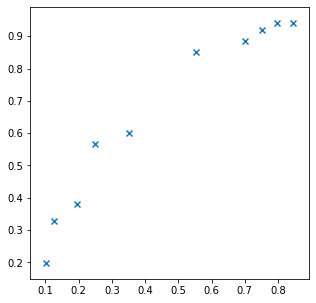

In [6]:
positive, X, Y = populate_data()
plt.close()
%matplotlib inline
plt.rcParams["figure.figsize"] = (5, 5)
plt.scatter(positive[:, 0], positive[:, 1], marker="x")
plt.show()

$$w^T * x =\begin{cases}\text{positive values } & w^T* x \geq 0\\\text{negative values } & w^T* x <  0\end{cases}$$

In [8]:
def decision_rule(w, x):
    return np.dot(w, x)

$$\text{gradient = }2*(((w^T* x) - y) * x)$$

In [9]:
def gradient(w, x, y):
    return 2 * np.multiply((decision_rule(w, x) - y), x)

$$\text{loss = }((w^T* x) - y)^2$$

In [10]:
def loss(w, x, y):
    return np.square(decision_rule(w, x) - y)

In [11]:
def train(w, lr, num_iter):
    for num_iter in range(num_iter):
        for iterator in range(len(X)):
            x = X[iterator]
            y = Y[iterator]
            w -= lr * gradient(w, x, y)
        dynamic_print("Step: {} Loss : {}".format(num_iter+1, loss(w, x, y)))
    print("\nTraining Complete")
    return w

In [12]:
W = train(np.array([0.0, 0.0]), 0.001, 3000)

Step: 3000 Loss : 0.00454193397682754455
Training Complete


In [13]:
%matplotlib inline
def slope_intercept():
    a, b = tuple(W)
    return a, b


def plt_decision_boundary():
    slope, intercept = slope_intercept()

    x = np.linspace(0, 1)
    y = slope * x + intercept
    plt.plot(x, y, "-r", label="decision boundary")
    plt.scatter(positive[:, 0], positive[:, 1], marker="o")
    plt.title("Graph of Decision Boundary")
    plt.xlabel("x", color="#1C2833")
    plt.ylabel("y", color="#1C2833")
    plt.legend(loc="upper left")
    plt.axis([0.0, 1, 0, 1])

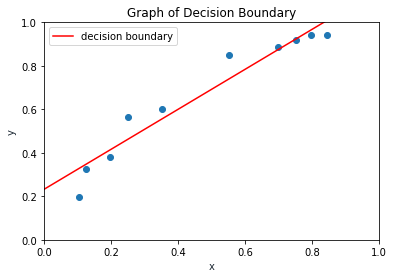

In [14]:
plt_decision_boundary()